In [ ]:
# Tratamiento de datos

import numpy as np
import pandas as pd

# Gráficos

import matplotlib.pyplot as plt
import seaborn as sns

# Modelos y métricas

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

In [ ]:
url = 'https://raw.githubusercontent.com/Jorge-89/Regresiones_TP_UNSAM/main/base_datos_estaciones_met_V3_train.csv'
df = pd.read_csv(url)

In [ ]:
df.columns

Index(['Unnamed: 0', 'fecha_completa', 'Fecha', 'Hora',
       'Temp_Alicia AgriculturaCba', 'Humedad_Alicia AgriculturaCba',
       'PP_Alicia AgriculturaCba', 'Temp_Las Varas AgriculturaCba',
       'Humedad_Las Varas AgriculturaCba', 'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas'],
      dtype='object')

In [ ]:
columnas = ['Temp_Alicia AgriculturaCba','Temp_Las Varas AgriculturaCba','Humedad_Las Varas AgriculturaCba',
            'Temp_San Miguel - Establecimiento Don Luis','Humedad_San Miguel - Establecimiento Don Luis',
            'Temp_San Miguel - Listello','Humedad_San Miguel - Listello','Temp_ San Miguel - Las Varillas','Humedad_ San Miguel - Las Varillas']

x = df[columnas]

y = df['Humedad_Alicia AgriculturaCba']

In [ ]:
# Separo en train y test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Opción 1: Decision Tree

In [ ]:
dtr = DecisionTreeRegressor(max_depth=4, random_state=42)  # instancio el modelo
dtr.fit(x_train,y_train)  # fiteo con datos de train

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
# realizo predicciones para los features de train y de test

y_dtr_pred_train = dtr.predict(x_train)
y_dtr_pred_test = dtr.predict(x_test)

### Métricas para el Decision Tree

In [ ]:
dtr_sqrt_train = np.sqrt(mean_squared_error(y_train, y_dtr_pred_train))
dtr_sqrt_test = np.sqrt(mean_squared_error(y_test, y_dtr_pred_test))

dtr_abs_train = mean_absolute_error(y_train, y_dtr_pred_train)
dtr_abs_test = mean_absolute_error(y_test, y_dtr_pred_test)

dtr_r2_train = r2_score(y_train, y_dtr_pred_train)
dtr_r2_test = r2_score(y_test, y_dtr_pred_test)

In [ ]:
print('El RMSE en train es: ',dtr_sqrt_train)
print('El RMSE en test es: ',dtr_sqrt_test,'\n')

print('El MAE en train es: ',dtr_abs_train)
print('El MAE en test es: ',dtr_abs_test,'\n')

print('El R2 en train es: ',dtr_r2_train)
print('El R2 en test es: ',dtr_r2_test,'\n')

El MSE en train es:  3.9340209821099608
El MSE en test es:  4.030142692579701 

El MAE en train es:  2.881970229667105
El MAE en test es:  2.8807219069593857 

El R2 en train es:  0.9671336864168167
El R2 en test es:  0.9646831997251151 



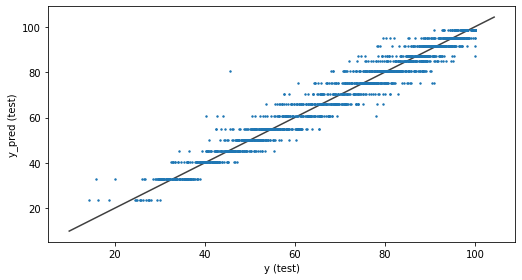

In [ ]:
plt.figure(figsize = (14,4))

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_dtr_pred_test, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

### Ajusto el modelo con Grid Search CV

In [ ]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "max_leaf_nodes": [5, 20, 50],
              }

grid_cv_dtr = GridSearchCV(dtr, param_grid, cv=5)

grid_cv_dtr.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=4, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 50],
                         'min_samples_split': [10, 20, 40]},
          

In [ ]:
print("R-Squared::{}".format(grid_cv_dtr.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtr.best_params_))

R-Squared::0.9737053858528842
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 6, 'max_leaf_nodes': 50, 'min_samples_split': 10}


In [ ]:
df_params = pd.DataFrame(data=grid_cv_dtr.cv_results_)
df_params

In [ ]:
print(f"Profundidad del árbol: {dtr.get_depth()}")
print(f"Número de nodos terminales: {dtr.get_n_leaves()}")

Profundidad del árbol: 4
Número de nodos terminales: 16


### Vuelvo a instanciar con nuevos hiperparámetros

In [ ]:
tipo, max_depth, max_leaf_nodes, min_samples_split = grid_cv_dtr.best_params_.values()

In [ ]:
dtr_ajustado = DecisionTreeRegressor(max_depth = max_depth, max_leaf_nodes = max_leaf_nodes, min_samples_split = min_samples_split)

In [ ]:
dtr_ajustado.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=50,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_dtr_pred_train = dtr_ajustado.predict(x_train)
y_dtr_pred_test = dtr_ajustado.predict(x_test)

In [ ]:
dtr_sqrt_train = np.sqrt(mean_squared_error(y_train, y_dtr_pred_train))
dtr_sqrt_test = np.sqrt(mean_squared_error(y_test, y_dtr_pred_test))

dtr_abs_train = mean_absolute_error(y_train, y_dtr_pred_train)
dtr_abs_test = mean_absolute_error(y_test, y_dtr_pred_test)

dtr_r2_train = r2_score(y_train, y_dtr_pred_train)
dtr_r2_test = r2_score(y_test, y_dtr_pred_test)

In [ ]:
print('El MSE en train es: ',dtr_sqrt_train)
print('El MSE en test es: ',dtr_sqrt_test,'\n')

print('El MAE en train es: ',dtr_abs_train)
print('El MAE en test es: ',dtr_abs_test,'\n')

print('El R2 en train es: ',dtr_r2_train)
print('El R2 en test es: ',dtr_r2_test,'\n')

El MSE en train es:  3.314150358056348
El MSE en test es:  3.6227006909506425 

El MAE en train es:  2.40687589137277
El MAE en test es:  2.5529350073212274 

El R2 en train es:  0.976674977762865
El R2 en test es:  0.9714631908472372 



In [ ]:
texto_modelo = export_text(
                    decision_tree = dtr_ajustado,
                    feature_names = list(x.columns)
               )
print(texto_modelo)

### El mejor modelo tiene los siguientes hiperparámetros: 

max_depth = 6

max_leaf_nodes = 50

min_samples_split = 10